In [1]:
#------------------------------------------
file01 = 'Twisted_2D_vdW_Bilayers_DFT.json'
file02 = 'Twisted_2D_vdW_Bilayers_Structures.json'
#-------------------------------------------------
Dir = ''
Dir_figures = 'figures_Histograms_plots'
#---------------------------------------



#===================
! pip install pandas
! pip install numpy
! pip install scipy
! pip install matplotlib
! pip install seaborn
! pip install ipywidgets
#=======================
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections.abc
from collections import defaultdict
import ipywidgets as widgets
from IPython.display import display, clear_output
from pandas.api.types import CategoricalDtype
#===================================================
path_folder = os.path.join(os.getcwd(), Dir_figures)
if not os.path.exists(path_folder): os.makedirs(path_folder)
figures_plot = Dir_figures
#=========================



#=================================
# DEFINITION OF ANALYSIS FUNCTIONS
#=================================
def media_absoluta_lista(data):
    """Calculates the average of the absolute values of a list, handling nesting."""
    if not isinstance(data, list) or not data: return pd.to_numeric(data, errors='coerce')
    flattened_list = []
    for item in data:
        if isinstance(item, collections.abc.Iterable) and not isinstance(item, (str, bytes)):
            flattened_list.extend(item)
        else:
            flattened_list.append(item)
    if not flattened_list: return np.nan
    numeric_items = [pd.to_numeric(x, errors='coerce') for x in flattened_list]
    numeric_items = [x for x in numeric_items if pd.notna(x)]
    if not numeric_items: return np.nan
    return np.mean([abs(x) for x in numeric_items])
#==================================================
def get_hashable_sg(sg_value):
    """ Converts a spatial group value to a hashable string. According to the new rule, if the value is a list, ONLY the first element is taken. """
    if isinstance(sg_value, list):
        # If the list is empty, returns 'N/A'
        if not sg_value:
            return 'N/A'
        # Takes only the first element of the list and converts it to a string.
        return str(sg_value[0])

    # If not a list, returns the value as is (if not None).
    return sg_value if sg_value is not None else 'N/A'
#=====================================================

Acesso negado.
Acesso negado.
Acesso negado.
Acesso negado.
Acesso negado.
Acesso negado.


In [2]:
#=========================================================
# Search for structures with specific tag values =========
#=========================================================

def search_properties_by_range(dataframe, key_to_search, min_value=None, max_value=None):
    """ Searches a DataFrame for entries where the value of a numeric column falls within a specified range [min_value, max_value]. """
    if key_to_search not in dataframe.columns:
        return pd.DataFrame() # Returns empty DataFrame if key does not exist

    results = dataframe.copy()

    # Converts the column to a numeric type, forcing errors to become NaN (Not a Number)
    results[key_to_search] = pd.to_numeric(results[key_to_search], errors='coerce')
    results = results.dropna(subset=[key_to_search]) # Removes rows that could not be converted

    if min_value is not None: results = results[results[key_to_search] >= min_value]
    if max_value is not None: results = results[results[key_to_search] <= max_value]

    return results

# Load and prepare the DataFrame
try:
    file_path = Dir + file01
    with open(file_path, 'r') as f: data = json.load(f)
    df = pd.DataFrame(data)

    # Preprocessing: Create the 'band_gap' column
    df['band_gap'] = df['e_cbm'] - df['e_vbm']

    print(f"Database loaded and preprocessed successfully! ({len(df)} entries)")

except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found.")
    df = pd.DataFrame() # Creates an empty DataFrame on error

# --- Creation of the Interactive Interface ---
if not df.empty:
    # Automatically identify numeric columns to populate the dropdown
    numeric_columns = sorted(df.select_dtypes(include='number').columns.tolist())

    # Create the widgets (the interface components)
    tag_dropdown = widgets.Dropdown( options=numeric_columns, value='band_gap',  style={'description_width': 'initial'}, layout={'width': '400px'} )
    min_value_input = widgets.FloatText( value=0.0, description='Minimum Value:', style={'description_width': 'initial'} )
    max_value_input = widgets.FloatText( value=1.0, description='Maximum Value:', style={'description_width': 'initial'} )
    search_button = widgets.Button( description='Search', button_style='success',  tooltip='Click to start searching with the values above', icon='search' )

    # Area where results will be displayed
    output_area = widgets.Output()

    # Define the function that will be executed when the button is clicked
    def on_button_clicked(b):
        # Clears any previous results
        with output_area:
            clear_output(wait=True)

            # Gets the current values of the widgets
            tag = tag_dropdown.value
            min_val = min_value_input.value
            max_val = max_value_input.value

            print(f"Searching for '{tag}' in the range {min_val} to {max_val}...")

            # Run the search
            results = search_properties_by_range(df, tag, min_value=min_val, max_value=max_val)

            # Displays the results
            if results.empty: print("No structures found with the specified criteria.")
            else:
                print(f"Found {len(results)} structures:")
                # Defines the columns to display to keep the table clean
                cols_to_show = ['id', 'formula', 'type_gap', 'rotation_angle']
                # Ensures that the searched column is the first one displayed after the curly braces
                if tag not in cols_to_show: cols_to_show.insert(2, tag)

                # Filters the DataFrame to show only columns that actually exist
                existing_cols_to_show = [col for col in cols_to_show if col in results.columns]
                display(results[existing_cols_to_show])

    # Connect the function to the button click event
    search_button.on_click(on_button_clicked)

    # Display the full interface in the notebook cell
    # Organizes widgets into vertical (VBox) and horizontal (HBox) boxes
    input_widgets = widgets.VBox([ widgets.HTML("<h3>Interactive Property Filter</h3>"), tag_dropdown, widgets.HBox([min_value_input, max_value_input]) ])

    ui = widgets.VBox([input_widgets, search_button, output_area])

    display(ui)

Database loaded and preprocessed successfully! (779 entries)


Database loaded successfully.
Configuration cell executed successfully. Functions and data ready to use.
Total of 18 unique angles found between 0° and 180° for the polar bar chart.


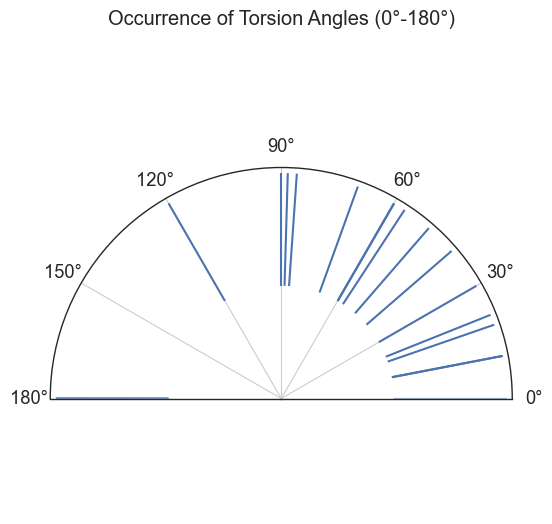


--- Occurrence of All Unique Angles (Decreasing Order of Frequency) ---

(Analysis based on 713 non-negative angles)
------------------------------------
Angle (degrees) | Occurrence (%)
----------------|-----------------
0.0000          | 35.6241%
60.0000         | 31.2763%
30.0000         | 20.1964%
90.0000         | 2.8050%
19.1066         | 2.2440%
40.8934         | 2.2440%
180.0000        | 1.9635%
49.1066         | 0.8415%
21.7868         | 0.8415%
10.8934         | 0.7013%
10.8930         | 0.2805%
179.9490        | 0.1403%
86.0320         | 0.1403%
59.9380         | 0.1403%
88.3360         | 0.1403%
70.1294         | 0.1403%
120.0000        | 0.1403%
56.8208         | 0.1403%


In [3]:
# ===================================================================================
# ANALYSIS AND PLOTTING OF OCCURRENCE OF ANGLES =====================================
# ===================================================================================

file_path = os.path.join(Dir, file01)

try:
    with open(file_path, 'r') as f: data = json.load(f)
    df_original = pd.DataFrame(data)
    print("Database loaded successfully.")
except Exception as e:
    df_original = pd.DataFrame()
    print(f"An error occurred while loading the file: {e}")

def run_analysis_and_plot(plot_stat_type):
    """Performs the entire processing, filtering, analysis, and plotting pipeline."""
    if df_original.empty:
        print("DataFrame is empty. Analysis cannot continue.")
        return

    print("\n--- Starting preprocessing and feature engineering ---")
    df_processed = df_original.copy()

    # Calculations and extractions (with and without SO)
    df_processed['rotation_angle'] = df_processed['rotation_angle'].fillna(0)
    # with SO
    try: df_processed['work_function_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_fermi_SO']
    except KeyError: pass
    try: df_processed['electronic_affinity_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_vbm_SO']
    except KeyError: pass
    try: df_processed['potential_ionization_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_cbm_SO']
    except KeyError: pass
    # without SO
    try: df_processed['work_function'] = df_processed['e_vacuum'] - df_processed['e_fermi']
    except KeyError: pass
    try: df_processed['electronic_affinity'] = df_processed['e_vacuum'] - df_processed['e_vbm']
    except KeyError: pass
    try: df_processed['potential_ionization'] = df_processed['e_vacuum'] - df_processed['e_cbm']
    except KeyError: pass

    list_to_process = ['area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change']
    for col in list_to_process:
        if col in df_processed.columns: df_processed[col] = df_processed[col].apply(media_absoluta_lista)
    if 'space_group' in df_processed.columns:
        df_processed['sg_bilayer'] = df_processed['space_group'].str[0]
        df_processed['sg_layer1'] = df_processed['space_group'].str[1]
        df_processed['sg_layer2'] = df_processed['space_group'].str[2]
    if 'inversion_symmetry' in df_processed.columns:
        df_processed['is_bilayer'] = df_processed['inversion_symmetry'].str[0].astype(bool)
        df_processed['is_layer1'] = df_processed['inversion_symmetry'].str[1].astype(bool)
        df_processed['is_layer2'] = df_processed['inversion_symmetry'].str[2].astype(bool)
    print("Preprocessing completed.")

    # DEFINING FEATURES AND FILTERING
    features_numericas = ['rotation_angle', 'e_binding', 'total_thickness', 'e_per_ion', 'z_separation', 'number_ions', 'area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change', 'e_per_area', 'e_slide', 'gap', 'gap_SO', 'work_function', 'work_function_SO', 'electronic_affinity', 'electronic_affinitya_SO', 'potential_ionization', 'potential_ionization_SO']
    features_categoricas = ['lattice_type', 'type_gap_SO', 'sg_bilayer', 'sg_layer1', 'sg_layer2', 'is_bilayer', 'is_layer1', 'is_layer2']
    features_numericas = [f for f in features_numericas if f in df_processed.columns]
    features_categoricas = [f for f in features_categoricas if f in df_processed.columns]

    df_analysis = df_processed.copy()
    for feature in features_numericas: df_analysis[feature] = pd.to_numeric(df_analysis[feature].apply(lambda x: x[0] if isinstance(x, list) else x), errors='coerce')

    limites_range = {'e_binding': [15.0, 100.0], 'z_separation': [None, 10.0]}

    print("\n--- Applying filters by value range ---")
    for feature, (min_val, max_val) in limites_range.items():
        if feature in df_analysis.columns:
            linhas_antes = len(df_analysis)
            if min_val is not None: df_analysis = df_analysis[df_analysis[feature] >= min_val]
            if max_val is not None: df_analysis = df_analysis[df_analysis[feature] <= max_val]
            print(f"- Filtro em '{feature}' (Min: {min_val}, Max: {max_val}): {linhas_antes - len(df_analysis)} entradas removidas.")

    df_analysis.dropna(subset=features_numericas, inplace=True)
    print("Filtering completed.")

    # ANALYSIS AND PLOTTING
    sns.set_theme(style="ticks", context="paper", font_scale=1.4)

    print("\n--- Descriptive Statistics Table ---")
    if not df_analysis.empty: display(df_analysis[features_numericas].describe().transpose().round(3))

    print("\n--- Individual Distribution Histograms ---")
    # The code to generate the distribution histograms has been removed as requested.

    print("\n--- Categorical Data Analysis ---")
    if not df_processed.empty:
        df_cat_analysis = df_processed.dropna(subset=features_categoricas).copy()
        if not df_cat_analysis.empty:
            for feature in features_categoricas:
                print(f"\n--- Counting to '{feature}' ---")
                display(df_cat_analysis[feature].value_counts().to_frame())

            print("\n--- Bar Graphs ---")
            ncols = 3
            nrows = int(np.ceil(len(features_categoricas) / ncols))
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows))
            axes = axes.flatten()
            for i, feature in enumerate(features_categoricas):
                if plot_stat_type == 'percent':
                    total = len(df_cat_analysis[feature].dropna())
                    perc_data = (df_cat_analysis[feature].value_counts() / total * 100).reset_index()
                    perc_data.columns = [feature, 'percent']
                    sns.barplot(data=perc_data, x=feature, y='percent', ax=axes[i], color="b")
                    axes[i].set_ylabel('Percentage (%)')
                else:
                    order = df_cat_analysis[feature].value_counts().index
                    sns.countplot(data=df_cat_analysis, x=feature, ax=axes[i], order=order, color="b")
                    axes[i].set_ylabel('Count')
                axes[i].set_title(f'Distribution of {feature}')
                axes[i].set_xlabel('')
                axes[i].tick_params(axis='x', rotation=45)
                sns.despine(ax=axes[i])
            for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
            plt.tight_layout()
            plt.savefig(os.path.join(figures_plot, '01_Categorical_bar_graphs.pdf'), dpi=300, bbox_inches='tight')
            plt.show()

    print("\n--- Generating Comparison Graphs (with and without Spin-Orbit) ---")
    # The code to generate the comparison charts has been removed as requested.

    print("\n--- Generating Correlation Matrix ---")
    if not df_analysis.empty and len(df_analysis) > 1:
        plt.figure(figsize=(20, 18))
        matriz_corr = df_analysis[features_numericas].corr()
        sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title('Correlation Heatmap (Filtered Data)', fontdict={'fontsize':16}, pad=12)
        plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
        plt.savefig(os.path.join(figures_plot, '02_Correlation_Matrix_filtered.pdf'), dpi=300, bbox_inches='tight')
        plt.show()

    print("\n--- Analysis Completed ---")

print("Configuration cell executed successfully. Functions and data ready to use.")

if not df_original.empty:
    # SANITIZATION AND FILTRATION OF ANGLES
    angulos_unpacked = df_original['rotation_angle'].apply(lambda x: x[0] if isinstance(x, list) else x)
    angulos_numeric = pd.to_numeric(angulos_unpacked, errors='coerce')
    angulos_validos = angulos_numeric.dropna()
    angulos_unicos = angulos_validos.unique()
    angulos_semi_circulo = angulos_unicos[(angulos_unicos >= 0) & (angulos_unicos <= 180)]
    print(f"Total of {len(angulos_semi_circulo)} unique angles found between 0° and 180° for the polar bar chart.")
    thetas_rad = np.deg2rad(angulos_semi_circulo)

    # POLAR BAR GRAPH PLOTTING
    sns.set_theme(style="white", context="paper", font_scale=1.5)
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': 'polar'})
    ax.vlines(thetas_rad, ymin=0.5, ymax=1.0, color="#4c72b0", linewidth=1.5)
    ax.set_thetamin(0)
    ax.set_thetamax(180)
    ax.set_theta_zero_location('E')
    ax.set_yticklabels([])
    ax.set_rgrids([])
    ax.set_thetagrids(np.arange(0, 181, 30))
    ax.set_title("Occurrence of Torsion Angles (0°-180°)", pad=20)
    plt.savefig(os.path.join(figures_plot, '03_Angular_barcode_graphic.pdf'), dpi=300, bbox_inches='tight')
    plt.show()

    # CALCULATION AND DISPLAY OF OCCURRENCE (TABLE)
    print("\n--- Occurrence of All Unique Angles (Decreasing Order of Frequency) ---")
    angulos_base_calculo = angulos_validos[angulos_validos >= 0]
    if not angulos_base_calculo.empty:
        ocorrencia_percentual = angulos_base_calculo.value_counts(normalize=True).mul(100)
        print(f"\n(Analysis based on {len(angulos_base_calculo)} non-negative angles)")
        print("------------------------------------")
        print("Angle (degrees) | Occurrence (%)")
        print("----------------|-----------------")
        for angulo, percentual in ocorrencia_percentual.items():
            print(f"{angulo:<15.4f} | {percentual:.4f}%")
    else: print("No valid angles were found to analyze.")
else: print("The DataFrame is empty. Cannot perform angle analysis.")

In [ ]:
file_path = os.path.join(Dir, file01)

try:
    with open(file_path, 'r') as f: data = json.load(f)
    df_original = pd.DataFrame(data)
    print("Database loaded successfully.")
except Exception as e:
    df_original = pd.DataFrame()
    print(f"An error occurred while loading the file: {e}")

def run_analysis_and_plot(plot_stat_type):
    """Performs the entire processing, filtering, analysis, and plotting pipeline."""
    if df_original.empty:
        print("DataFrame is empty. Analysis cannot continue.")
        return

    print("\n--- Starting preprocessing and feature engineering ---")
    df_processed = df_original.copy()

    # Calculations and extractions (with and without SO)
    df_processed['rotation_angle'] = df_processed['rotation_angle'].fillna(0)
    # with SO
    try: df_processed['work_function_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_fermi_SO']
    except KeyError: pass
    try: df_processed['afinidade_eletronica_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_vbm_SO']
    except KeyError: pass
    try: df_processed['potencial_ionizacao_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_cbm_SO']
    except KeyError: pass
    # without SO
    try: df_processed['work_function'] = df_processed['e_vacuum'] - df_processed['e_fermi']
    except KeyError: pass
    try: df_processed['afinidade_eletronica'] = df_processed['e_vacuum'] - df_processed['e_vbm']
    except KeyError: pass
    try: df_processed['potencial_ionizacao'] = df_processed['e_vacuum'] - df_processed['e_cbm']
    except KeyError: pass

    list_to_process = ['area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change']
    for col in list_to_process:
        if col in df_processed.columns: df_processed[col] = df_processed[col].apply(media_absoluta_lista)
    if 'space_group' in df_processed.columns:
        df_processed['sg_bilayer'] = df_processed['space_group'].str[0]
        df_processed['sg_layer1'] = df_processed['space_group'].str[1]
        df_processed['sg_layer2'] = df_processed['space_group'].str[2]
    if 'inversion_symmetry' in df_processed.columns:
        df_processed['is_bilayer'] = df_processed['inversion_symmetry'].str[0].astype(bool)
        df_processed['is_layer1'] = df_processed['inversion_symmetry'].str[1].astype(bool)
        df_processed['is_layer2'] = df_processed['inversion_symmetry'].str[2].astype(bool)
    print("Pré-processamento concluído.")

    # DEFINING FEATURES AND FILTERING
    features_numericas = ['rotation_angle', 'e_binding', 'total_thickness', 'e_per_ion', 'z_separation', 'number_ions', 'area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change', 'e_per_area', 'e_slide', 'gap', 'gap_SO', 'work_function', 'work_function_SO', 'afinidade_eletronica', 'afinidade_eletronica_SO', 'potencial_ionizacao', 'potencial_ionizacao_SO']
    features_categoricas = ['lattice_type', 'type_gap_SO', 'sg_bilayer', 'sg_layer1', 'sg_layer2', 'is_bilayer', 'is_layer1', 'is_layer2']
    features_numericas = [f for f in features_numericas if f in df_processed.columns]
    features_categoricas = [f for f in features_categoricas if f in df_processed.columns]

    df_analysis = df_processed.copy()
    for feature in features_numericas: df_analysis[feature] = pd.to_numeric(df_analysis[feature].apply(lambda x: x[0] if isinstance(x, list) else x), errors='coerce')

    limites_range = {'e_binding': [15.0, 100.0], 'z_separation': [None, 10.0]}

    print("\n--- Applying filters by value range ---")
    for feature, (min_val, max_val) in limites_range.items():
        if feature in df_analysis.columns:
            linhas_antes = len(df_analysis)
            if min_val is not None: df_analysis = df_analysis[df_analysis[feature] >= min_val]
            if max_val is not None: df_analysis = df_analysis[df_analysis[feature] <= max_val]
            print(f"- Filter in '{feature}' (Min: {min_val}, Max: {max_val}): {linhas_antes - len(df_analysis)} entries removed.")

    df_analysis.dropna(subset=features_numericas, inplace=True)
    print("Filtering completed.")

    # ANALYSIS AND PLOTTING
    sns.set_theme(style="ticks", context="paper", font_scale=1.4)

    print("\n--- Descriptive Statistics Table ---")
    if not df_analysis.empty: display(df_analysis[features_numericas].describe().transpose().round(3))

    print("\n--- Individual Distribution Histograms ---")
    # The code to generate the distribution histograms has been removed as requested.

    print("\n--- Categorical Data Analysis ---")
    if not df_processed.empty:
        df_cat_analysis = df_processed.dropna(subset=features_categoricas).copy()
        if not df_cat_analysis.empty:
            for feature in features_categoricas:
                print(f"\n--- Counting to '{feature}' ---")
                display(df_cat_analysis[feature].value_counts().to_frame())

            print("\n--- Bar Graphs ---")
            ncols = 3
            nrows = int(np.ceil(len(features_categoricas) / ncols))
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows))
            axes = axes.flatten()
            for i, feature in enumerate(features_categoricas):
                if plot_stat_type == 'percent':
                    total = len(df_cat_analysis[feature].dropna())
                    perc_data = (df_cat_analysis[feature].value_counts() / total * 100).reset_index()
                    perc_data.columns = [feature, 'percent']
                    sns.barplot(data=perc_data, x=feature, y='percent', ax=axes[i], color="b")
                    axes[i].set_ylabel('Percentage (%)')
                else:
                    order = df_cat_analysis[feature].value_counts().index
                    sns.countplot(data=df_cat_analysis, x=feature, ax=axes[i], order=order, color="b")
                    axes[i].set_ylabel('Count')
                axes[i].set_title(f'Distribution of {feature}')
                axes[i].set_xlabel('')
                axes[i].tick_params(axis='x', rotation=45)
                sns.despine(ax=axes[i])
            for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
            plt.tight_layout()
            plt.savefig(os.path.join(figures_plot, '04_Categorical_bar_graphs.pdf'), dpi=300, bbox_inches='tight')
            plt.show()

    print("\n--- Generating Comparison Graphs (with and without Spin-Orbit) ---")
    # The code to generate the comparison charts has been removed as requested.

    print("\n--- Generating Correlation Matrix ---")
    if not df_analysis.empty and len(df_analysis) > 1:
        plt.figure(figsize=(20, 18))
        matriz_corr = df_analysis[features_numericas].corr()
        sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title('Correlation Heatmap (Filtered Data)', fontdict={'fontsize':16}, pad=12)
        plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
        plt.savefig(os.path.join(figures_plot, '05_Correlation_Matrix_filtered.pdf'), dpi=300, bbox_inches='tight')
        plt.show()

    print("\n--- Analysis Completed ---")

print("Configuration cell executed successfully. Functions and data ready to use.")

if not df_original.empty:
    plot_type_chooser = widgets.ToggleButtons(options=[('Percentage (%)', 'percent'), ('Absolute Count', 'count')], description='Eixo Y:', button_style='info')
    run_button = widgets.Button(description='Start Full Analysis', button_style='success', icon='play', layout=widgets.Layout(width='auto', height='auto'))
    output_area = widgets.Output()

    def on_run_button_clicked(b):
        with output_area:
            clear_output(wait=True)
            print("Performing analysis... Please wait.")
            # The `run_analysis_and_plot` function has been defined in the configuration cell
            run_analysis_and_plot(plot_stat_type=plot_type_chooser.value)

    run_button.on_click(on_run_button_clicked)

    print("Analysis Controls:")
    display(widgets.VBox([plot_type_chooser, run_button, output_area]))
else: print("The interactive interface cannot be created because the DataFrame has not been loaded.")

In [ ]:
#===========================================================
# Statistics for database angles (4-100 atoms) ============
#===========================================================

file_path = os.path.join(Dir, file02)

try:
    with open(file_path, 'r') as f: data = json.load(f)
    df = pd.DataFrame(data)
    df = df.T # Transpose the DataFrame
    print("Database loaded successfully.")
except Exception as e:
    df = pd.DataFrame()
    print(f"An error occurred while loading the file: {e}")


if not df.empty:
    # --- COMPLETE SANITIZATION OF NECESSARY DATA ---
    print("\n---Sanitizing angle and ion number data ---")

    df['rotation_angle_clean'] = df['rotation_angle'].apply(lambda x: x[0] if isinstance(x, list) else x)
    df['rotation_angle_clean'] = pd.to_numeric(df['rotation_angle_clean'], errors='coerce')

    df['number_ions_clean'] = df['number_ions'].apply(lambda x: x[0] if isinstance(x, list) else x)
    df['number_ions_clean'] = pd.to_numeric(df['number_ions_clean'], errors='coerce')

    df_analysis = df[['rotation_angle_clean', 'number_ions_clean']].dropna()
    print("Sanitização concluída.")

    # --- LIST OF UNIQUE ANGLES ---
    print("\n--- List of Unique Twist Angles Found ---")
    angulos_unicos_encontrados = df_analysis['rotation_angle_clean'].unique()
    angulos_ordenados = np.sort(angulos_unicos_encontrados)
    print("Printing in ascending order:")
    print(np.round(angulos_ordenados, 4))

    # Save the list to a text file
    try:
        # Saves the file in the main directory defined by "Dir"
        np.savetxt(os.path.join(Dir, 'unique_angles_list.txt'), angulos_ordenados, fmt='%.4f', header='Unique Angles (ascending order)')
        print(f"\n>>> The list of angles has been saved to the file '{os.path.join(Dir, 'unique_angles_list.txt')}'.")
    except Exception as e:
        print(f"\nError saving text file: {e}")


    # --- PREPARING DATA FOR BOTH GRAPHICS ---
    bins = [4, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
    labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
    labels[0] = '4-10'
    seen_angles = set()
    new_angle_counts = []
    for i in range(len(bins) - 1):
        lower_bound, upper_bound = bins[i], bins[i+1]
        subset_df = df_analysis[(df_analysis['number_ions_clean'] >= lower_bound) & (df_analysis['number_ions_clean'] < upper_bound)]
        current_bin_angles = set(subset_df['rotation_angle_clean'].unique())
        new_angles = current_bin_angles - seen_angles
        new_angle_counts.append(len(new_angles))
        seen_angles.update(current_bin_angles)
    plot_data_hist = pd.DataFrame({'Range of Atoms': labels, 'New Angle Count': new_angle_counts})

    # Data for Inset Plot (Semicircle)
    angulos_semi_circulo = angulos_unicos_encontrados[(angulos_unicos_encontrados >= 0) & (angulos_unicos_encontrados <= 180)]
    thetas_rad = np.deg2rad(angulos_semi_circulo)

    # --- CREATING THE COMBINED GRAPH ---
    print("\n--- Generating Combined Chart ---")
    sns.set_theme(style="ticks", context="paper", font_scale=1.4)
    fig, ax_main = plt.subplots(figsize=(12, 7))

    # Draw the main graph (Histogram)
    sns.barplot(data=plot_data_hist, x='Range of Atoms', y='New Angle Count', ax=ax_main, color='b', alpha=0.7)
    sns.lineplot(data=plot_data_hist, x='Range of Atoms', y='New Angle Count', ax=ax_main, color='r', marker='o', sort=False)
    ax_main.set_title("New Unique Angles Introduced by System Size")
    ax_main.set_xlabel("Range of Number of Atoms in the Cell")
    ax_main.set_ylabel("Counting New Unique Angles")
    sns.despine(ax=ax_main)

    # Creates and draws the Inset Plot
    ax_inset = fig.add_axes([0.18, 0.58, 0.3, 0.3], projection='polar')
    ax_inset.vlines(thetas_rad, ymin=0.5, ymax=1.0, color="#4c72b0", linewidth=0.1)
    ax_inset.set_thetamin(0)
    ax_inset.set_thetamax(180)
    ax_inset.set_theta_zero_location('E')
    ax_inset.set_yticklabels([])
    ax_t_labels = ax_inset.set_thetagrids(np.arange(0, 181, 45))
    for label in ax_inset.get_xticklabels(): label.set_fontsize(9)
    ax_inset.set_rgrids([])

    # Saves and displays the final figure
    # The figure is now saved in the 'dir_figures' directory
    plt.savefig(os.path.join(figures_plot, '06_Angles_graph_combined.pdf'), dpi=300, bbox_inches='tight')
    plt.show()


# Searching for structures within a given range of rotation angles
min_angle = 1.0
max_angle = 2.0

if not df.empty:
    # The column 'rotation_angle_clean' has already been created and sanitized previously
    # Apply the filter to find the angles in the desired range
    resultados = df[ (df['rotation_angle_clean'] >= min_angle) & (df['rotation_angle_clean'] <= max_angle) ].copy()

    # --- DISPLAY OF RESULTS ---
    print(f"\n--- Structures with Rotation Angle between {min_angle}° and {max_angle}° ---")

    if not resultados.empty:
        colunas_para_mostrar = ['id', 'formula', 'rotation_angle_clean']
        resultados_finais = resultados[colunas_para_mostrar].sort_values(by='rotation_angle_clean').reset_index(drop=True)
        print(resultados_finais.to_string())
    else: print("No structures were found in this angle range.")

In [ ]:
#========================================================================
# Statistics for database structural calculations (4-100 atoms) =========
#========================================================================

file_path = os.path.join(Dir, file02)

try:
    with open(file_path, 'r') as f: data = json.load(f)
    df_original = pd.DataFrame(data)
    print("Original database loaded successfully.")
    # Transpõe o DataFrame se necessário
    df_original = df_original.T
except Exception as e:
    df_original = pd.DataFrame()
    print(f"An error occurred while loading the file: {e}")

# MAIN ANALYSIS FUNCTION (Performed by the button)
def run_analysis_and_plot(plot_stat_type):
    """Performs the entire processing, filtering, analysis, and plotting pipeline."""
    if df_original.empty:
        print("DataFrame is empty. Analysis cannot continue.")
        return

    print("\n--- Starting preprocessing and feature engineering ---")
    df_processed = df_original.copy()

    df_processed['rotation_angle'] = df_processed['rotation_angle'].fillna(0)

    list_to_process = ['area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change']
    for col in list_to_process:
        if col in df_processed.columns: df_processed[col] = df_processed[col].apply(media_absoluta_lista)
    if 'space_group' in df_processed.columns:
        df_processed['sg_bilayer'] = df_processed['space_group'].str[0]
        df_processed['sg_layer1'] = df_processed['space_group'].str[1]
        df_processed['sg_layer2'] = df_processed['space_group'].str[2]
    if 'inversion_symmetry' in df_processed.columns:
        df_processed['is_bilayer'] = df_processed['inversion_symmetry'].str[0].astype(bool)
        df_processed['is_layer1'] = df_processed['inversion_symmetry'].str[1].astype(bool)
        df_processed['is_layer2'] = df_processed['inversion_symmetry'].str[2].astype(bool)
    print("Pré-processamento concluído.")

    # TOP 30 MOST FREQUENT ANGLES
    print("\n--- Top 30 Most Common Twist Angles ---")
    angulos_sanitizados = pd.to_numeric(df_processed['rotation_angle'].apply(lambda x: x[0] if isinstance(x, list) else x), errors='coerce')
    angulos_base_calculo = angulos_sanitizados.dropna()
    angulos_base_calculo = angulos_base_calculo[angulos_base_calculo >= 0]
    if not angulos_base_calculo.empty:
        ocorrencia_percentual = angulos_base_calculo.value_counts(normalize=True) * 100
        top_30_angulos = ocorrencia_percentual.head(30)
        print(f"(Percentages calculated on a total of {len(angulos_base_calculo)} non-negative angles)")
        print("Angle (degrees) | Occurrence (%)")
        print("----------------|-----------------")
        for angulo, percentual in top_30_angulos.items():
            print(f"{angulo:<15.4f} | {percentual:.2f}%")
    else: print("There are no angles to analyze frequency.")

    # DEFINING FEATURES AND FILTERING FOR GRAPHICS
    features_numericas = ['rotation_angle', 'total_thickness', 'number_ions', 'area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change']
    features_categoricas = ['lattice_type', 'sg_bilayer', 'sg_layer1', 'sg_layer2', 'is_bilayer', 'is_layer1', 'is_layer2']
    features_numericas = [f for f in features_numericas if f in df_processed.columns]
    features_categoricas = [f for f in features_categoricas if f in df_processed.columns]

    df_analysis = df_processed.copy()
    for feature in features_numericas: df_analysis[feature] = pd.to_numeric(df_analysis[feature].apply(lambda x: x[0] if isinstance(x, list) else x), errors='coerce')

    limites_range = {'z_separation': [None, 10.0]}
    print("\n--- Applying filters by value range (for graphs) ---")
    for feature, (min_val, max_val) in limites_range.items():
        if feature in df_analysis.columns:
            linhas_antes = len(df_analysis)
            if min_val is not None: df_analysis = df_analysis[df_analysis[feature] >= min_val]
            if max_val is not None: df_analysis = df_analysis[df_analysis[feature] <= max_val]
            print(f"- Filter in '{feature}' (Min: {min_val}, Max: {max_val}): {linhas_antes - len(df_analysis)} entries removed.")
    df_analysis.dropna(subset=features_numericas, inplace=True)
    print("Filtering for graphs completed.")

    # ANALYSIS AND PLOTTING
    sns.set_theme(style="ticks", context="paper", font_scale=1.4)
    print("\n--- Descriptive Statistics Table (Filtered Data for Graphs) ---")
    if not df_analysis.empty: display(df_analysis[features_numericas].describe().transpose().round(3))

    print("\n--- Individual Distribution Histograms ---")
    if not df_processed.empty:
        ncols = 4
        nrows = int(np.ceil(len(features_numericas) / ncols))
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 5 * nrows))
        axes = axes.flatten()
        for i, feature in enumerate(features_numericas):
            title = f'Distribution of {feature}'
            if feature == 'rotation_angle':
                plot_data = pd.to_numeric(df_processed[feature].apply(lambda x: x[0] if isinstance(x, list) else x), errors='coerce').dropna()
                plot_data = plot_data[plot_data >= 0].to_frame(name=feature)
                title = f'Distribution of {feature} (Total, >= 0)'
            else:
                plot_data = df_analysis[[feature]].copy().dropna()

            if not plot_data.empty:
                sns.histplot(data=plot_data, x=feature, ax=axes[i], kde=True, bins=25, stat=plot_stat_type, color="b")
                axes[i].set_title(title)
                axes[i].set_xlabel('Value')
                axes[i].set_ylabel('Percentage (%)' if plot_stat_type == 'percent' else 'Contagem')
                sns.despine(ax=axes[i])

                if feature == 'rotation_angle':
                    max_angle = plot_data[feature].max()
                    axes[i].set_xticks(np.arange(0, max_angle + 30, 30))

        for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
        plt.tight_layout()
        # Salva a figura em PDF
        plt.savefig(os.path.join(figures_plot, '07_Structural_Distribution_histograms.pdf'), dpi=300, bbox_inches='tight')
        plt.show()

    print("\n--- Categorical Data Analysis ---")
    if not df_processed.empty:
        df_cat_analysis = df_processed.dropna(subset=features_categoricas).copy()
        if not df_cat_analysis.empty:
            for feature in features_categoricas:
                print(f"\n--- Counting to '{feature}' ---")
                display(df_cat_analysis[feature].value_counts().to_frame())
            print("\n--- Bar Graphs ---")
            ncols = 3
            nrows = int(np.ceil(len(features_categoricas) / ncols))
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows))
            axes = axes.flatten()
            for i, feature in enumerate(features_categoricas):
                if plot_stat_type == 'percent':
                    total = len(df_cat_analysis[feature].dropna())
                    perc_data = (df_cat_analysis[feature].value_counts() / total * 100).reset_index()
                    perc_data.columns = [feature, 'percent']
                    sns.barplot(data=perc_data, x=feature, y='percent', ax=axes[i], color="b")
                    axes[i].set_ylabel('Percentage (%)')
                else:
                    order = df_cat_analysis[feature].value_counts().index
                    sns.countplot(data=df_cat_analysis, x=feature, ax=axes[i], order=order, color="b")
                    axes[i].set_ylabel('Count')
                axes[i].set_title(f'Distribution of {feature}')
                axes[i].set_xlabel('')
                axes[i].tick_params(axis='x', rotation=45)
                sns.despine(ax=axes[i])
            for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
            plt.tight_layout()
            # Salva a figura em PDF
            plt.savefig(os.path.join(figures_plot, '08_Structural_Categorical_bar_graphs.pdf'), dpi=300, bbox_inches='tight')
            plt.show()


# CREATION AND DISPLAY OF THE INTERACTIVE INTERFACE
if not df_original.empty:
    plot_type_chooser = widgets.ToggleButtons(options=[('Percentage (%)', 'percent'), ('Absolute Count', 'count')], description='Eixo Y:', button_style='info')
    run_button = widgets.Button(description='Start Full Analysis', button_style='success', icon='play', layout=widgets.Layout(width='auto', height='auto'))
    output_area = widgets.Output()
    def on_run_button_clicked(b):
        with output_area:
            clear_output(wait=True)
            print("Performing analysis... Please wait.")
            run_analysis_and_plot(plot_stat_type=plot_type_chooser.value)
    run_button.on_click(on_run_button_clicked)
    print("Analysis Controls:")
    display(widgets.VBox([plot_type_chooser, run_button, output_area]))
else: print("The interface cannot be created because the DataFrame has not been loaded.")

In [ ]:
# =======================================
# STATISTICAL ANALYSIS ==================
# ===================================================================================
# Statistics for electronic structure calculations from the database (4-30 atoms) ===
# ===================================================================================

figures_plot = Dir_figures
file_path = os.path.join(Dir, file01)

try:
    with open(file_path, 'r') as f: data = json.load(f)
    df_original = pd.DataFrame(data)
    print("Original database loaded successfully.")
except Exception as e:
    df_original = pd.DataFrame()
    print(f"An error occurred while loading the file: {e}")

# Function to calculate and scale load transfer.
def calculate_charge_transfer(data):
    """ Calculates the average of the absolute values of the first element of each of the two sublists and rescales the result. """
    if not isinstance(data, list) or len(data) < 2 or not all(isinstance(sub, list) and sub for sub in data[:2]):
        return np.nan
    try:
        val1 = float(data[0][0])
        val2 = float(data[1][0])
        mean_abs_val = (abs(val1) + abs(val2)) / 2.0
        scaled_val = mean_abs_val / 1e13
        return scaled_val
    except (ValueError, TypeError, IndexError):
        return np.nan

# MAIN ANALYSIS FUNCTION (Performed by the button)
def run_analysis_and_plot(plot_stat_type):
    """Performs the entire processing, filtering, analysis, and plotting pipeline."""
    if df_original.empty:
        print("DataFrame is empty. Analysis cannot continue.")
        return

    print("\n--- Starting preprocessing and feature engineering ---")
    df_processed = df_original.copy()

    # Preprocessing section
    df_processed['rotation_angle'] = df_processed['rotation_angle'].fillna(0)
    try: df_processed['work_function_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_fermi_SO']
    except KeyError: pass
    try: df_processed['electronic_affinity_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_vbm_SO']
    except KeyError: pass
    try: df_processed['potential_ionization_SO'] = df_processed['e_vacuum_SO'] - df_processed['e_cbm_SO']
    except KeyError: pass
    try: df_processed['work_function'] = df_processed['e_vacuum'] - df_processed['e_fermi']
    except KeyError: pass
    try: df_processed['electronic_affinity'] = df_processed['e_vacuum'] - df_processed['e_vbm']
    except KeyError: pass
    try: df_processed['potential_ionization'] = df_processed['e_vacuum'] - df_processed['e_cbm']
    except KeyError: pass

    # Charge transfer processing.
    if 'charge_transfer' in df_processed.columns:
        df_processed['charge_transfer_scaled'] = df_processed['charge_transfer'].apply(calculate_charge_transfer)
    if 'charge_transfer_SO' in df_processed.columns:
        df_processed['charge_transfer_SO_scaled'] = df_processed['charge_transfer_SO'].apply(calculate_charge_transfer)

    list_to_process = ['area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change']
    for col in list_to_process:
        if col in df_processed.columns: df_processed[col] = df_processed[col].apply(media_absoluta_lista)
    if 'space_group' in df_processed.columns:
        df_processed['sg_bilayer'] = df_processed['space_group'].str[0]
        df_processed['sg_layer1'] = df_processed['space_group'].str[1]
        df_processed['sg_layer2'] = df_processed['space_group'].str[2]
    if 'inversion_symmetry' in df_processed.columns:
        df_processed['is_bilayer'] = df_processed['inversion_symmetry'].str[0].astype(bool)
        df_processed['is_layer1'] = df_processed['inversion_symmetry'].str[1].astype(bool)
        df_processed['is_layer2'] = df_processed['inversion_symmetry'].str[2].astype(bool)
    print("Pré-processamento concluído.")

    # Filtering section
    # Inclusion of load features in the list.
    features_numericas = ['rotation_angle', 'e_binding', 'total_thickness', 'e_per_ion', 'z_separation', 'number_ions', 'area_perc_mismatch', 'perc_area_change', 'angle_perc_mismatch', 'perc_angle_change', 'e_per_area', 'e_slide', 'gap', 'gap_SO', 'work_function', 'work_function_SO', 'electronic_affinity', 'electronic_affinity_SO', 'potential_ionization', 'potential_ionization_SO', 'charge_transfer_scaled', 'charge_transfer_SO_scaled']
    features_categoricas = ['lattice_type', 'type_gap_SO', 'sg_bilayer', 'sg_layer1', 'sg_layer2', 'is_bilayer', 'is_layer1', 'is_layer2']
    features_numericas = [f for f in features_numericas if f in df_processed.columns]
    features_categoricas = [f for f in features_categoricas if f in df_processed.columns]
    df_analysis = df_processed.copy()
    for feature in features_numericas:
        df_analysis[feature] = pd.to_numeric(df_analysis[feature].apply(lambda x: x[0] if isinstance(x, list) else x), errors='coerce')
    limites_range = {'e_binding': [15.0, 100.0], 'z_separation': [None, 10.0]}
    print("\n--- Applying filters by value range ---")
    for feature, (min_val, max_val) in limites_range.items():
        if feature in df_analysis.columns:
            linhas_antes = len(df_analysis)
            if min_val is not None: df_analysis = df_analysis[df_analysis[feature] >= min_val]
            if max_val is not None: df_analysis = df_analysis[df_analysis[feature] <= max_val]
            print(f"- Filtro em '{feature}' (Min: {min_val}, Max: {max_val}): {linhas_antes - len(df_analysis)} entradas removidas.")
    df_analysis.dropna(subset=features_numericas, inplace=True)
    print("Filtering completed.")

    # ANALYSIS AND PLOTTING
    sns.set_theme(style="ticks", context="paper", font_scale=1.4)

    print("\n--- Descriptive Statistics Table ---")
    if not df_analysis.empty: display(df_analysis[features_numericas].describe().transpose().round(3))

    # =============================================================================
    # === PLOTTING HISTOGRAMS =====================================================
    # =============================================================================
    print("\n--- Individual and Comparative Distribution Histograms ---")
    if not df_analysis.empty:
        # Charge transfer pair for comparison.
        pares_para_fundir = { 'work_function': 'work_function_SO', 'gap': 'gap_SO', 'electronic_affinity': 'electronic_affinity_SO', 'potential_ionization': 'potential_ionization_SO', 'charge_transfer_scaled': 'charge_transfer_SO_scaled' }

        # Fixed range for load transfer.
        ranges_fixos = { 'gap': (0, 2.5), 'e_slide': (15, 100), 'charge_transfer_scaled': (0, 16) }

        features_plotadas = set()
        features_para_plotar = []
        temp_set = set()
        for feat in features_numericas:
            if feat not in temp_set:
                features_para_plotar.append(feat)
                if feat in pares_para_fundir:
                    temp_set.add(pares_para_fundir[feat])

        ncols = 4
        nrows = int(np.ceil(len(features_para_plotar) / ncols))
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows))
        axes = axes.flatten()

        ax_idx = 0
        for feature in features_numericas:
            if feature in features_plotadas:
                continue

            if ax_idx >= len(axes):
                break

            ax = axes[ax_idx]

            # The feature is a pair to be merged
            if feature in pares_para_fundir and pares_para_fundir[feature] in df_analysis.columns:
                feat_sem_so = feature
                feat_com_so = pares_para_fundir[feature]

                df_sem = df_analysis[[feat_sem_so]].dropna().rename(columns={feat_sem_so: 'valor'})
                df_sem['Tipo'] = 'Sem SO'
                df_com = df_analysis[[feat_com_so]].dropna().rename(columns={feat_com_so: 'valor'})
                df_com['Tipo'] = 'Com SO'
                df_plot_merged = pd.concat([df_sem, df_com])

                # Logic to customize the load plot.
                is_charge_plot = 'charge_transfer' in feat_sem_so
                num_bins = 100 if is_charge_plot else 20
                titulo_amigavel = feat_sem_so.replace('_scaled', '').replace('_', ' ').title()

                sns.histplot(data=df_plot_merged, x='valor', hue='Tipo', multiple='dodge', kde=True, ax=ax, stat=plot_stat_type, bins=num_bins, palette={'Sem SO': '#4c72b0', 'Com SO': '#dd8452'})

                ax.set_title(f'Comparação de {titulo_amigavel}')

                # Customizing the x-axis for the load plot.
                if is_charge_plot:
                    ax.set_xlabel("Charge Transfer (x $10^{13}$ |e|)")
                    ax.set_xticks(np.arange(0, 17, 2))
                else: ax.set_xlabel("Energy (eV)")

                if ax.get_legend(): ax.get_legend().set_title('')

                features_plotadas.add(feat_sem_so)
                features_plotadas.add(feat_com_so)

            # The feature is a normal single graph
            else:
                plot_data = df_analysis[[feature]].copy().dropna()
                title = f'Distribution of {feature}'
                if feature == 'rotation_angle':
                    plot_data = plot_data[plot_data[feature] >= 0]
                    title = f'Distribution of {feature} (>= 0)'

                if feature == 'e_slide': bins = 100

                sns.histplot(data=plot_data, x=feature, ax=ax, kde=True, bins=25, stat=plot_stat_type, color="b")
                ax.set_title(title)
                ax.set_xlabel('Value')

                if feature == 'rotation_angle' and not plot_data.empty:
                    max_angle = plot_data[feature].max()
                    ax.set_xticks(np.arange(0, max_angle + 30, 30))

                features_plotadas.add(feature)

            # Applies the x-axis limit if the feature is in the fixed ranges dictionary
            if feature in ranges_fixos: ax.set_xlim(ranges_fixos[feature])

            ax.set_ylabel('Percentage (%)' if plot_stat_type == 'percent' else 'Contagem')
            sns.despine(ax=ax)
            ax_idx += 1

        for j in range(ax_idx, len(axes)): fig.delaxes(axes[j])

        plt.tight_layout()
        plt.savefig(os.path.join(figures_plot, '09_Distribution_histograms_combined.pdf'), dpi=300, bbox_inches='tight')
        plt.show()

    print("\n--- Analysis Completed ---")


# CREATION AND DISPLAY OF THE INTERACTIVE INTERFACE
if not df_original.empty:
    plot_type_chooser = widgets.ToggleButtons(options=[('Percentage (%)', 'percent'), ('Absolute Count', 'count')], description='Eixo Y:', button_style='info')
    run_button = widgets.Button(description='Start Full Analysis', button_style='success', icon='play', layout=widgets.Layout(width='auto', height='auto'))
    output_area = widgets.Output()

    def on_run_button_clicked(b):
        with output_area:
            clear_output(wait=True)
            print("Performing analysis... Please wait.")
            run_analysis_and_plot(plot_stat_type=plot_type_chooser.value)

    run_button.on_click(on_run_button_clicked)
    print("Analysis Controls:")
    display(widgets.VBox([plot_type_chooser, run_button, output_area]))
else: print("The interactive interface cannot be created because the DataFrame has not been loaded.")

In [ ]:
def analyze_symmetry_and_plot_heatmap(json_file_path):
    """ Main function to read the database, analyze symmetry transitions and generate a heatmap. """

    try:
        with open(json_file_path, 'r') as f: data = json.load(f)
        print(f"Arquivo '{json_file_path}' loaded successfully.")
    except FileNotFoundError:
        print(f"Error: File '{json_file_path}' not found.")
        return # Terminates execution if the file does not exist

    # Separate monolayer and bilayer inputs
    monolayers = [entry for entry in data if entry.get('number_layers') == 1]
    bilayers = [entry for entry in data if entry.get('number_layers') == 2]
    print(f"Found {len(monolayers)} monolayers and {len(bilayers)} bilayers.")

    # Create a dictionary to map each monolayer's 'id' to its 'space_group'.
    # The get_hashable_sg function (now fixed) ensures correct space group extraction.
    mono_sg_map = {m['id']: get_hashable_sg(m.get('space_group')) for m in monolayers}

    # Process the bilayers to find the symmetry transitions
    symmetry_transitions = []
    for bilayer in bilayers:
        bilayer_sg = get_hashable_sg(bilayer.get('space_group'))
        id_layers = bilayer.get('id_layers')

        if not id_layers or len(id_layers) != 2: continue

        sg1 = mono_sg_map.get(id_layers[0], 'N/A')
        sg2 = mono_sg_map.get(id_layers[1], 'N/A')

        if sg1 == 'N/A' or sg2 == 'N/A' or bilayer_sg == 'N/A':
            continue

        # Unify the symmetry pairs by permutation, ordering them.
        mono_sg_pair = tuple(sorted((sg1, sg2)))

        symmetry_transitions.append({ 'Monolayer Pair Symmetries': f"{mono_sg_pair[0]} + {mono_sg_pair[1]}", 'Bilayer Symmetry': bilayer_sg })

    # Generate the graph if any symmetry transition is found
    if not symmetry_transitions:
        print("Analysis completed, but could not find enough space group data to generate the graph.")
        return

    print(f"Analyzing {len(symmetry_transitions)} valid symmetry transitions...")

    # Create a DataFrame with the data and aggregate it for the heatmap
    df = pd.DataFrame(symmetry_transitions)

    y_axis_order = sorted(df['Bilayer Symmetry'].unique())
    x_axis_order = sorted(df['Monolayer Pair Symmetries'].unique())

    heatmap_data = df.groupby(['Bilayer Symmetry', 'Monolayer Pair Symmetries']).size().unstack(fill_value=0)
    heatmap_data = heatmap_data.reindex(index=y_axis_order, columns=x_axis_order)

    # Plot the heatmap
    num_y_labels = len(heatmap_data.index)
    num_x_labels = len(heatmap_data.columns)
    fig_height = max(8, num_y_labels * 0.7)
    fig_width = max(12, num_x_labels * 1.0)

    plt.figure(figsize=(fig_width, fig_height))

    sns.heatmap( heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Transition Frequency'} )

    plt.title('Heat Map of Symmetry Transitions: Monolayers to Bilayers', fontsize=16, pad=20)
    plt.xlabel('Space Group Pair of Constituent Monolayers', fontsize=12)
    plt.ylabel('Resulting Bilayer Space Group', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout(pad=3.0)

    # Save the figure and show confirmation message
    output_filename = figures_plot + '/10_Symmetry_Transition_heatmap.pdf'
    plt.savefig(output_filename, bbox_inches='tight')

    print(f"\nChart generated successfully! Heatmap saved as '{output_filename}'.")

# Start of Script Execution
if __name__ == '__main__':
    json_file = Dir + file01
    analyze_symmetry_and_plot_heatmap(json_file)

In [ ]:
def analyze_symmetry_and_plot_heatmap(mono_json_path, bi_json_path, output_path_prefix=""):
    """ Main function that reads data from separate files and generates symmetry transition heatmap. """

    # Load Monolayer data from first file
    try:
        with open(mono_json_path, 'r') as f: mono_data_full = json.load(f)
        print(f"Monolayer file '{mono_json_path}' successfully uploaded.")
        #Extract only the monolayer entries to create the symmetry map
        monolayers = [entry for entry in mono_data_full if entry.get('number_layers') == 1]
    except FileNotFoundError:
        print(f"Error: Monolayer file '{mono_json_path}' not found.")
        return

    # Load Bilayer data from second file
    try:
        # Reads JSON from bilayers and transposes it
        df_bi_raw = pd.read_json(bi_json_path)
        bilayers_df = df_bi_raw.T
        print(f"Bilayer file '{bi_json_path}' successfully loaded and transposed.")
    except FileNotFoundError:
        print(f"Error: Bilayer file '{bi_json_path}' not found.")
        return

    print(f"Found {len(monolayers)} monolayers and {len(bilayers_df)} bilayers.")

    # Create a dictionary to map each monolayer's 'id' to its 'space_group'.
    mono_sg_map = {m['id']: get_hashable_sg(m.get('space_group')) for m in monolayers}

    # Process the bilayers to find the symmetry transitions
    symmetry_transitions = []
    # Iteration is now over the rows of the bilayer DataFrame
    for index, bilayer_row in bilayers_df.iterrows():
        bilayer_sg = get_hashable_sg(bilayer_row.get('space_group'))
        id_layers = bilayer_row.get('id_layers')

        if id_layers is None or len(id_layers) != 2: continue

        sg1 = mono_sg_map.get(id_layers[0], 'N/A')
        sg2 = mono_sg_map.get(id_layers[1], 'N/A')

        if sg1 == 'N/A' or sg2 == 'N/A' or bilayer_sg == 'N/A': continue

        # Unify the symmetry pairs by permutation, ordering them.
        mono_sg_pair = tuple(sorted((sg1, sg2)))

        symmetry_transitions.append({ 'Monolayer Pair Symmetries': f"{mono_sg_pair[0]} + {mono_sg_pair[1]}", 'Bilayer Symmetry': bilayer_sg })

    # Generate the graph if any symmetry transition is found
    if not symmetry_transitions:
        print("Analysis completed, but could not find enough space group data to generate the graph.")
        return

    print(f"Analyzing {len(symmetry_transitions)} valid symmetry transitions...")

    # Create a DataFrame with the data and aggregate it for the heatmap
    df = pd.DataFrame(symmetry_transitions)

    y_axis_order = sorted(df['Bilayer Symmetry'].unique())
    x_axis_order = sorted(df['Monolayer Pair Symmetries'].unique())

    heatmap_data = df.groupby(['Bilayer Symmetry', 'Monolayer Pair Symmetries']).size().unstack(fill_value=0)
    heatmap_data = heatmap_data.reindex(index=y_axis_order, columns=x_axis_order)

    # Plot the heatmap
    num_y_labels = len(heatmap_data.index)
    num_x_labels = len(heatmap_data.columns)
    fig_height = max(8, num_y_labels * 0.7)
    fig_width = max(12, num_x_labels * 1.0)

    plt.figure(figsize=(fig_width, fig_height))

    sns.heatmap( heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Transition Frequency'} )

    plt.title('Heat Map of Symmetry Transitions: Monolayers vs. Bilayers', fontsize=16, pad=20)
    plt.xlabel('Space Group Pair of Constituent Monolayers', fontsize=12)
    plt.ylabel('Resulting Bilayer Space Group', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout(pad=3.0)

    # Save the figure and show confirmation message
    output_filename = figures_plot + '/11_Symmetry_Transition_heatmap_full.pdf'
    plt.savefig(output_filename)

    print(f"\nFixed chart generated successfully! The heatmap has been saved as '{output_filename}'.")

# Start of Script Execution
if __name__ == '__main__':

    # Using local file names for execution.
    mono_file = Dir + file01
    bi_file = Dir + file02

    analyze_symmetry_and_plot_heatmap( mono_json_path=mono_file, bi_json_path=bi_file, output_path_prefix="" )

In [ ]:
def analyze_and_plot_corrected_filtering(mono_json_path, bi_json_path, output_path_prefix=""):
    """ Reads data, calculates overall percentages, filters plot rows/columns based on those percentages (1% threshold), and generates the final clustermap. """
 
    # DATA LOADING
    try:
        with open(mono_json_path, 'r') as f: mono_data_full = json.load(f)
        print(f"Monolayer file '{mono_json_path}' successfully uploaded.")
        monolayers = [entry for entry in mono_data_full if entry.get('number_layers') == 1]
    except FileNotFoundError:
        print(f"Error: Monolayer file '{mono_json_path}' not found.")
        return

    try:
        df_bi_raw = pd.read_json(bi_json_path)
        bilayers_df = df_bi_raw
        print(f"Bilayer file '{bi_json_path}' successfully loaded and transposed.")
    except FileNotFoundError:
        print(f"Error: Bilayer file '{bi_json_path}' not found.")
        return

    # TRANSITION PROCESSING
    mono_sg_map = {m['id']: get_hashable_sg(m.get('space_group')) for m in monolayers}
    symmetry_transitions = []
    for index, bilayer_row in bilayers_df.iterrows():
        bilayer_sg = get_hashable_sg(bilayer_row.get('space_group'))
        id_layers = bilayer_row.get('id_layers')
        if id_layers is None or not isinstance(id_layers, list) or len(id_layers) != 2: continue
        sg1 = mono_sg_map.get(id_layers[0], 'N/A')
        sg2 = mono_sg_map.get(id_layers[1], 'N/A')
        if sg1 == 'N/A' or sg2 == 'N/A' or bilayer_sg == 'N/A': continue
        mono_sg_pair = tuple(sorted((sg1, sg2)))
        symmetry_transitions.append({
            'Monolayer Pair Symmetries': f"{mono_sg_pair[0]} + {mono_sg_pair[1]}",
            'Bilayer Symmetry': bilayer_sg
        })

    if not symmetry_transitions:
        print("No valid symmetry transitions were found.")
        return

    df = pd.DataFrame(symmetry_transitions)
    heatmap_data_raw = df.groupby(['Bilayer Symmetry', 'Monolayer Pair Symmetries']).size().unstack(fill_value=0)

    # OVERALL PERCENTAGE CALCULATION AND PLOT FILTERING

    # Calculate percentages based on the grand total of transitions
    total_transitions = heatmap_data_raw.sum().sum()
    if total_transitions == 0:
        print("No transitions counted. The graph will not be generated.")
        return

    percent_data_full = (heatmap_data_raw / total_transitions) * 100

    # Determine which rows/columns of the PLOT will be removed
    # The threshold is 0.5%, since the matrix already contains percentage values.
    threshold = 0.5

    rows_to_keep = percent_data_full.sum(axis=1) >= threshold
    cols_to_keep = percent_data_full.sum(axis=0) >= threshold

    # Create the final matrix for the plot, with the correct percentages
    heatmap_to_plot = percent_data_full.loc[rows_to_keep, cols_to_keep]

    if heatmap_to_plot.empty:
        print("No transitions remain after applying the 1% filter. The graph will not be generated.")
        return

    print(f"Heatmap dimensions after removing rows/columns from the plot: {heatmap_to_plot.shape}")

    # GENERATION OF THE FINAL HEAT MAP

    cluster_grid = sns.clustermap(heatmap_to_plot, annot=False)
    plt.close(cluster_grid.fig)
    reordered_data = heatmap_to_plot.iloc[cluster_grid.dendrogram_row.reordered_ind, cluster_grid.dendrogram_col.reordered_ind]

    fig_height_factor = 0.2
    plt.figure(figsize=(max(12, reordered_data.shape[1] * 0.4), max(8, reordered_data.shape[0] * fig_height_factor)))

    ax = sns.heatmap( reordered_data, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar=True, cbar_kws={'label': 'Percentage of Grand Total Transitions (%)'} )

    ax.set_title('Heatmap of Relevant Symmetry Transitions', fontsize=16)
    ax.set_xlabel('Monolayer Space Group Pair (Grouped by similarity)')
    ax.set_ylabel('Bilayer Space Group (Grouped by similarity)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    output_filename = figures_plot + '/12_Clustered_Heatmap_filtered.pdf'
    plt.savefig(output_filename, bbox_inches='tight')

    print(f"\nFinal and corrected heatmap saved as '{output_filename}'.")

if __name__ == '__main__':
    mono_file = Dir + file01
    bi_file = Dir + file01

    analyze_and_plot_corrected_filtering( mono_json_path=mono_file, bi_json_path=bi_file, output_path_prefix="" )

In [ ]:
def analyze_and_plot_corrected_filtering(mono_json_path, bi_json_path, output_path_prefix=""):
    """ Reads data, calculates overall percentages, filters plot rows/columns based on those percentages (1% threshold), and generates the final clustermap. """

    # DATA LOADING
    try:
        with open(mono_json_path, 'r') as f: mono_data_full = json.load(f)
        print(f"Monolayer file '{mono_json_path}' successfully uploaded.")
        monolayers = [entry for entry in mono_data_full if entry.get('number_layers') == 1]
    except FileNotFoundError:
        print(f"Error: Monolayer file '{mono_json_path}' not found.")
        return

    try:
        df_bi_raw = pd.read_json(bi_json_path)
        bilayers_df = df_bi_raw.T
        print(f"Bilayer file '{bi_json_path}' successfully loaded and transposed.")
    except FileNotFoundError:
        print(f"Error: Bilayer file '{bi_json_path}' not found.")
        return

    # TRANSITION PROCESSING
    mono_sg_map = {m['id']: get_hashable_sg(m.get('space_group')) for m in monolayers}
    symmetry_transitions = []
    for index, bilayer_row in bilayers_df.iterrows():
        bilayer_sg = get_hashable_sg(bilayer_row.get('space_group'))
        id_layers = bilayer_row.get('id_layers')
        if id_layers is None or not isinstance(id_layers, list) or len(id_layers) != 2: continue
        sg1 = mono_sg_map.get(id_layers[0], 'N/A')
        sg2 = mono_sg_map.get(id_layers[1], 'N/A')
        if sg1 == 'N/A' or sg2 == 'N/A' or bilayer_sg == 'N/A': continue
        mono_sg_pair = tuple(sorted((sg1, sg2)))
        symmetry_transitions.append({ 'Monolayer Pair Symmetries': f"{mono_sg_pair[0]} + {mono_sg_pair[1]}", 'Bilayer Symmetry': bilayer_sg })

    if not symmetry_transitions:
        print("No valid symmetry transitions were found.")
        return

    df = pd.DataFrame(symmetry_transitions)
    heatmap_data_raw = df.groupby(['Bilayer Symmetry', 'Monolayer Pair Symmetries']).size().unstack(fill_value=0)

    # OVERALL PERCENTAGE CALCULATION AND PLOT FILTERING

    # Calculate percentages based on the grand total of transitions
    total_transitions = heatmap_data_raw.sum().sum()
    if total_transitions == 0:
        print("No transitions counted. The graph will not be generated.")
        return

    percent_data_full = (heatmap_data_raw / total_transitions) * 100

    # Determine which rows/columns of the PLOT will be removed
    # The threshold is 0.5%, since the matrix already contains percentage values.
    threshold = 0.5

    rows_to_keep = percent_data_full.sum(axis=1) >= threshold
    cols_to_keep = percent_data_full.sum(axis=0) >= threshold

    # Create the final matrix for the plot, with the correct percentages
    heatmap_to_plot = percent_data_full.loc[rows_to_keep, cols_to_keep]

    if heatmap_to_plot.empty:
        print("No transitions remain after applying the 1% filter. The graph will not be generated.")
        return

    print(f"Heatmap dimensions after removing rows/columns from the plot: {heatmap_to_plot.shape}")

    # GENERATION OF THE FINAL HEAT MAP

    cluster_grid = sns.clustermap(heatmap_to_plot, annot=False)
    plt.close(cluster_grid.fig)
    reordered_data = heatmap_to_plot.iloc[cluster_grid.dendrogram_row.reordered_ind, cluster_grid.dendrogram_col.reordered_ind]

    fig_height_factor = 0.2
    plt.figure(figsize=(max(12, reordered_data.shape[1] * 0.4), max(8, reordered_data.shape[0] * fig_height_factor)))

    ax = sns.heatmap( reordered_data, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar=True, cbar_kws={'label': 'Percentage of Grand Total Transitions (%)'} )

    ax.set_title('Heatmap of Relevant Symmetry Transitions', fontsize=16)
    ax.set_xlabel('Monolayer Space Group Pair (Grouped by similarity)')
    ax.set_ylabel('Bilayer Space Group (Grouped by similarity)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    output_filename = figures_plot + '/13_Clustered_heatmap_filtered.pdf'
    plt.savefig(output_filename, bbox_inches='tight')

    print(f"\nFinal and corrected heatmap saved as '{output_filename}'.")

if __name__ == '__main__':
    mono_file = Dir + file01
    bi_file = Dir + file02

    analyze_and_plot_corrected_filtering( mono_json_path=mono_file, bi_json_path=bi_file, output_path_prefix="" )

In [ ]:
def analyze_and_plot_final_corrected(json_file_path):
    """ Final function to generate the unified histogram with the symmetry ordering properly corrected and other styles. """

    try:
        with open(json_file_path, 'r') as f: data = json.load(f)
        print(f"File '{json_file_path}' uploaded successfully.")
    except FileNotFoundError:
        print(f"Error: File '{json_file_path}' not found.")
        return

    monolayers = [entry for entry in data if entry.get('number_layers') == 1]
    bilayers = [entry for entry in data if entry.get('number_layers') == 2]
    print(f"Found {len(monolayers)} monolayers and {len(bilayers)} bilayers.")

    # Data Collection
    bilayer_symmetries = pd.Series([get_hashable_sg(b.get('space_group')) for b in bilayers if get_hashable_sg(b.get('space_group')) != 'N/A'])
    monolayer_symmetries = pd.Series([get_hashable_sg(m.get('space_group')) for m in monolayers if get_hashable_sg(m.get('space_group')) != 'N/A'])

    # UNIFIED HISTOGRAM
    print("\nGenerating the unified histogram with symmetry-corrected ordering...")

    # Pre-calculate the percentages
    mono_perc = (monolayer_symmetries.value_counts() / len(monolayer_symmetries) * 100).reset_index()
    mono_perc.columns = ['Space Group', 'Percentage']
    mono_perc['Tipo'] = 'Monolayers'

    bi_perc = (bilayer_symmetries.value_counts() / len(bilayer_symmetries) * 100).reset_index()
    bi_perc.columns = ['Space Group', 'Percentage']
    bi_perc['Tipo'] = 'Bilayers'

    df_plot = pd.concat([mono_perc, bi_perc])

    # Reorder by symmetry (largest to smallest) using a score
    all_known_groups = df_plot['Space Group'].unique()

    # Scoring dictionary for the symmetry hierarchy
    score_map = {'C2/m': 4, 'P2/m': 3, 'Pm': 2, 'P1': 1}

    # Sorts the groups found in your data based on score (highest first)
    final_order = sorted(all_known_groups, key=lambda g: score_map.get(g, 0), reverse=True)

    print(f"X-axis final order (Greatest -> Least symmetry): {final_order}")

    # Prepare reordered data for plotting
    mono_data = df_plot[df_plot['Tipo'] == 'Monolayers'].set_index('Space Group').reindex(final_order)
    bi_data = df_plot[df_plot['Tipo'] == 'Bilayers'].set_index('Space Group').reindex(final_order)

    # Plotting with Matplotlib for full control
    fig, ax1 = plt.subplots(figsize=(15, 8))
    x = np.arange(len(final_order))  # Group positions on the X axis
    width = 0.4  # Width of each individual bar to be close together

    # Draw the bars (without percentage labels)
    ax1.bar(x - width/2, mono_data['Percentage'].fillna(0), width, label='Monolayers', color='#0d3b66', edgecolor='white', linewidth=1.5)
    ax1.bar(x + width/2, bi_data['Percentage'].fillna(0), width, label='Bilayers', color='#f95738', edgecolor='white', linewidth=1.5)

    # Add density curves (KDE)
    ax2 = ax1.twinx()
    sg_map = {sg: i for i, sg in enumerate(final_order)}
    mono_numeric = monolayer_symmetries.map(sg_map).dropna()
    bi_numeric = bilayer_symmetries.map(sg_map).dropna()
    sns.kdeplot(x=mono_numeric, ax=ax2, color='#0d3b66', linewidth=2.5)
    sns.kdeplot(x=bi_numeric, ax=ax2, color='#f95738', linewidth=2.5)

    # Cleaning and finalizing the chart
    ax1.set_ylabel('Percentage (%)', fontsize=12)
    ax1.set_xlabel('Space Group', fontsize=12)
    ax1.set_title('Percentage Distribution of Space Groups (Ordered by Symmetry)', fontsize=16, pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(final_order, rotation=45, ha='right')
    ax1.legend(title='Structure Type')

    ax2.set_ylabel('')
    ax2.set_yticks([])

    fig.tight_layout(pad=2.0)

    output_filename = figures_plot + '/14_Symmetry_histogram_combined_30atoms.pdf'
    plt.savefig(output_filename)
    print(f"Final and corrected histogram saved as '{output_filename}'.")

    print("\nAnalysis completed.")

if __name__ == '__main__':
    json_file = Dir + file01
    analyze_and_plot_final_corrected(json_file_path=json_file)

In [ ]:
def analyze_plot_from_separate_files(mono_json_path, bi_json_path):
    """ Final function that reads data from separate files, generates the unified histogram with symmetry ordering and other styles. """

    # Load Monolayer Data
    try:
        with open(mono_json_path, 'r') as f: mono_data_full = json.load(f)
        print(f"Monolayer file '{mono_json_path}' successfully uploaded.")
        # Extract only the monolayer entries from the first file
        monolayers = [entry for entry in mono_data_full if entry.get('number_layers') == 1]
    except FileNotFoundError:
        print(f"Error: Monolayer file '{mono_json_path}' not found.")
        return

    # Loading Bilayer Data
    try:
        # Reads JSON and transposes it
        df_bi_raw = pd.read_json(bi_json_path)
        bilayers_df = df_bi_raw.T
        print(f"Bilayer file '{bi_json_path}' successfully loaded and transposed.")
    except FileNotFoundError:
        print(f"Error: Bilayer file '{bi_json_path}' not found.")
        return

    print(f"Found {len(monolayers)} monolayers and {len(bilayers_df)} bilayers.")

    # Symmetry Data Collection
    bilayer_symmetries = pd.Series([get_hashable_sg(g) for g in bilayers_df['space_group'] if get_hashable_sg(g) != 'N/A'])
    monolayer_symmetries = pd.Series([get_hashable_sg(m.get('space_group')) for m in monolayers if get_hashable_sg(m.get('space_group')) != 'N/A'])

    # UNIFIED HISTOGRAM
    print("\nGenerating the unified histogram with symmetry ordering...")

    # Pre-calculate the percentages
    mono_perc = (monolayer_symmetries.value_counts() / len(monolayer_symmetries) * 100).reset_index()
    mono_perc.columns = ['Space Group', 'Percentage']
    mono_perc['Tipo'] = 'Monolayers'

    bi_perc = (bilayer_symmetries.value_counts() / len(bilayer_symmetries) * 100).reset_index()
    bi_perc.columns = ['Space Group', 'Percentage']
    bi_perc['Tipo'] = 'Bilayers'

    df_plot = pd.concat([mono_perc, bi_perc])

    # Reorder by symmetry (largest to smallest)
    all_known_groups = df_plot['Space Group'].unique()
    score_map = {'C2/m': 4, 'P2/m': 3, 'Pm': 2, 'P1': 1}
    final_order = sorted(all_known_groups, key=lambda g: score_map.get(g, 0), reverse=True)

    print(f"X-axis final order (Greatest -> Least symmetry): {final_order}")

    mono_data = df_plot[df_plot['Tipo'] == 'Monolayers'].set_index('Space Group').reindex(final_order)
    bi_data = df_plot[df_plot['Tipo'] == 'Bilayers'].set_index('Space Group').reindex(final_order)

    # Plotting with Matplotlib
    fig, ax1 = plt.subplots(figsize=(15, 8))
    x = np.arange(len(final_order))
    width = 0.4

    ax1.bar(x - width/2, mono_data['Percentage'].fillna(0), width, label='Monolayers', color='#0d3b66', edgecolor='white', linewidth=1.5)
    ax1.bar(x + width/2, bi_data['Percentage'].fillna(0), width, label='Bilayers', color='#f95738', edgecolor='white', linewidth=1.5)

    ax2 = ax1.twinx()
    sg_map = {sg: i for i, sg in enumerate(final_order)}
    mono_numeric = monolayer_symmetries.map(sg_map).dropna()
    bi_numeric = bilayer_symmetries.map(sg_map).dropna()
    sns.kdeplot(x=mono_numeric, ax=ax2, color='#0d3b66', linewidth=2.5)
    sns.kdeplot(x=bi_numeric, ax=ax2, color='#f95738', linewidth=2.5)

    # Cleaning and finalizing the chart
    ax1.set_ylabel('Percentage (%)', fontsize=12)
    ax1.set_xlabel('Space Group', fontsize=12)
    ax1.set_title('Percentage Distribution of Space Groups (Ordered by Symmetry)', fontsize=16, pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(final_order, rotation=45, ha='right')
    ax1.legend(title='Structure Type')

    ax2.set_ylabel('')
    ax2.set_yticks([])

    fig.tight_layout(pad=2.0)

    output_filename = figures_plot + '/15_Symmetry_histogram_combined_100atoms.pdf'
    plt.savefig(output_filename)
    print(f"Final histogram saved as '{output_filename}'.")

    print("\nAnalysis completed.")

if __name__ == '__main__':
    mono_file = Dir + file01
    bi_file = Dir + file02
    analyze_plot_from_separate_files(mono_json_path=mono_file, bi_json_path=bi_file)